In [111]:
import numpy as np
import scipy as sp
import re

# Часть 1

1.Открытие скачанного файла к работе (sentences.txt).

2.Каждая строка в файле соответствует одному предложению. 
Считайте их, приведите каждую к нижнему регистру с помощью строковой функции lower().



In [112]:
with open("sentences.txt") as file:
    data_frame = []
    
    #to count the number of sentences for task #5
    count = 0
    for line in file:
        count += 1
        data_frame.append(line.lower().rstrip())
print(data_frame[:6])

['in comparison to dogs, cats have not undergone major changes during the domestication process.', 'as cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.', 'a common interactive use of cat for a single file is to output the content of a file to standard output.', 'cats can hear sounds too faint or too high in frequency for human ears, such as those made by mice and other small animals.', 'in one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.', 'the domesticated cat and its closest wild ancestor are both diploid organisms that possess 38 chromosomes and roughly 20,000 genes.']


3.Произведите токенизацию, то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: re.split('[^a-z]', t). Не забудьте удалить пустые слова после разделения.

In [113]:
import re

# здесь пробегаемся по каждому слову в массиве и, используя регулярное выражение, разделяем его
# на выходе получается массив из массивов слов

for i in range(len(data_frame)):
    data_frame[i] = re.split('[^a-z]', data_frame[i])
    
    #возникшие пробелы удаляются путем list_comprehension  
    data_frame[i] = [el for el in data_frame[i] if el != '']

In [114]:
print(data_frame[:6])

[['in', 'comparison', 'to', 'dogs', 'cats', 'have', 'not', 'undergone', 'major', 'changes', 'during', 'the', 'domestication', 'process'], ['as', 'cat', 'simply', 'catenates', 'streams', 'of', 'bytes', 'it', 'can', 'be', 'also', 'used', 'to', 'concatenate', 'binary', 'files', 'where', 'it', 'will', 'just', 'concatenate', 'sequence', 'of', 'bytes'], ['a', 'common', 'interactive', 'use', 'of', 'cat', 'for', 'a', 'single', 'file', 'is', 'to', 'output', 'the', 'content', 'of', 'a', 'file', 'to', 'standard', 'output'], ['cats', 'can', 'hear', 'sounds', 'too', 'faint', 'or', 'too', 'high', 'in', 'frequency', 'for', 'human', 'ears', 'such', 'as', 'those', 'made', 'by', 'mice', 'and', 'other', 'small', 'animals'], ['in', 'one', 'people', 'deliberately', 'tamed', 'cats', 'in', 'a', 'process', 'of', 'artificial', 'selection', 'as', 'they', 'were', 'useful', 'predators', 'of', 'vermin'], ['the', 'domesticated', 'cat', 'and', 'its', 'closest', 'wild', 'ancestor', 'are', 'both', 'diploid', 'organism

4.Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.

In [115]:
# создади словарь, пробежимся по внешнему массиву, пробежимся по внутреннему массиву,
# выполнив проверку на вхождение того или иного слова в словарь

fr = dict()
for data_frame_sent in data_frame:
    for word in data_frame_sent:
        if word not in fr:
            fr[word] = 1
        else:
            fr[word] += 1

print(fr)

{'in': 11, 'comparison': 1, 'to': 14, 'dogs': 1, 'cats': 4, 'have': 2, 'not': 1, 'undergone': 1, 'major': 2, 'changes': 2, 'during': 1, 'the': 20, 'domestication': 1, 'process': 2, 'as': 6, 'cat': 10, 'simply': 2, 'catenates': 1, 'streams': 1, 'of': 19, 'bytes': 2, 'it': 4, 'can': 3, 'be': 3, 'also': 2, 'used': 1, 'concatenate': 2, 'binary': 1, 'files': 1, 'where': 2, 'will': 2, 'just': 3, 'sequence': 2, 'a': 13, 'common': 1, 'interactive': 1, 'use': 2, 'for': 4, 'single': 1, 'file': 5, 'is': 7, 'output': 3, 'content': 2, 'standard': 1, 'hear': 1, 'sounds': 1, 'too': 2, 'faint': 1, 'or': 3, 'high': 1, 'frequency': 1, 'human': 2, 'ears': 1, 'such': 2, 'those': 1, 'made': 1, 'by': 3, 'mice': 1, 'and': 14, 'other': 2, 'small': 2, 'animals': 1, 'one': 4, 'people': 1, 'deliberately': 1, 'tamed': 1, 'artificial': 1, 'selection': 1, 'they': 1, 'were': 2, 'useful': 1, 'predators': 1, 'vermin': 1, 'domesticated': 1, 'its': 2, 'closest': 1, 'wild': 1, 'ancestor': 1, 'are': 2, 'both': 1, 'diploid

In [116]:
#сортировка словаря по значениям (по фану), чтобы определить частоту встречаемости слов

sorted_by_value = sorted(fr.items(), key=lambda kv: -kv[1])
print(sorted_by_value)

[('the', 20), ('of', 19), ('to', 14), ('and', 14), ('a', 13), ('in', 11), ('cat', 10), ('x', 9), ('apple', 8), ('os', 8), ('is', 7), ('as', 6), ('mac', 6), ('file', 5), ('on', 5), ('you', 5), ('mountain', 5), ('cats', 4), ('it', 4), ('for', 4), ('one', 4), ('has', 4), ('leopard', 4), ('lion', 4), ('can', 3), ('be', 3), ('just', 3), ('output', 3), ('or', 3), ('by', 3), ('command', 3), ('using', 3), ('released', 3), ('tiger', 3), ('computers', 3), ('have', 2), ('major', 2), ('changes', 2), ('process', 2), ('simply', 2), ('bytes', 2), ('also', 2), ('concatenate', 2), ('where', 2), ('will', 2), ('sequence', 2), ('use', 2), ('content', 2), ('too', 2), ('human', 2), ('such', 2), ('other', 2), ('small', 2), ('were', 2), ('its', 2), ('are', 2), ('that', 2), ('redirected', 2), ('with', 2), ('redirection', 2), ('commands', 2), ('when', 2), ('stdin', 2), ('new', 2), ('was', 2), ('contains', 2), ('over', 2), ('installed', 2), ('installation', 2), ('s', 2), ('releasing', 2), ('versions', 2), ('an',

5.Создайте матрицу размера n * d, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 22 * 254.

In [117]:
print('Итоговое количество предложений в тексте : ', count)
print('Итоговое количество слов в тексте : ', len(fr))

Итоговое количество предложений в тексте :  22
Итоговое количество слов в тексте :  254


In [120]:
#создадим список слов для постоянства порядка
word_list = list(fr)
print(word_list)

['in', 'comparison', 'to', 'dogs', 'cats', 'have', 'not', 'undergone', 'major', 'changes', 'during', 'the', 'domestication', 'process', 'as', 'cat', 'simply', 'catenates', 'streams', 'of', 'bytes', 'it', 'can', 'be', 'also', 'used', 'concatenate', 'binary', 'files', 'where', 'will', 'just', 'sequence', 'a', 'common', 'interactive', 'use', 'for', 'single', 'file', 'is', 'output', 'content', 'standard', 'hear', 'sounds', 'too', 'faint', 'or', 'high', 'frequency', 'human', 'ears', 'such', 'those', 'made', 'by', 'mice', 'and', 'other', 'small', 'animals', 'one', 'people', 'deliberately', 'tamed', 'artificial', 'selection', 'they', 'were', 'useful', 'predators', 'vermin', 'domesticated', 'its', 'closest', 'wild', 'ancestor', 'are', 'both', 'diploid', 'organisms', 'that', 'possess', 'chromosomes', 'roughly', 'genes', 'domestic', 'similar', 'size', 'members', 'genus', 'felis', 'typically', 'weighing', 'between', 'kg', 'lb', 'however', 'if', 'piped', 'redirected', 'unnecessary', 'with', 'named

In [127]:
#Создаем матрицу (Количество предложений)*(Количество уникальных слов)
# элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение
matrix = []
diff = len(word_list)
print('number of unique words :', diff)

for i in range(count):
    temp = []
    for j in range(diff):
        temp.append(data_frame[i].count(word_list[j]))
    matrix.append(np.array(temp))
print(matrix)

number of unique words : 254
[array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 

6.Найдите косинусное расстояние от предложения в самой первой строке (In comparison to dogs, cats have not undergone...) до всех остальных с помощью функции scipy.spatial.distance.cosine. 

Какие номера у двух предложений, ближайших к нему по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание. Само предложение (In comparison to dogs, cats have not undergone... ) имеет индекс 0.

In [141]:
from scipy import spatial
# массив для хранения косинусных расстояний для первого и остальных предложений 
result = dict()
for i in range(count):
    result[i] = spatial.distance.cosine(matrix[0], matrix[i])
    #result.append(spatial.distance.cosine(matrix[0], matrix[i]))
print("Итоговый словарь косинусных расстояний : \n")  
print(result, '\n')

print("Отсортированный массив косинусных расстояний : \n")
sorted_by_value = sorted(result.items(), key=lambda kv: kv[1])
print(sorted_by_value)

Итоговый словарь косинусных расстояний : 

{0: 0.0, 1: 0.9527544408738466, 2: 0.8644738145642124, 3: 0.8951715163278082, 4: 0.7770887149698589, 5: 0.9402385695332803, 6: 0.7327387580875756, 7: 0.9258750683338899, 8: 0.8842724875284311, 9: 0.9055088817476932, 10: 0.8328165362273942, 11: 0.8804771390665607, 12: 0.8396432548525454, 13: 0.8703592552895671, 14: 0.8740118423302576, 15: 0.9442721787424647, 16: 0.8406361854220809, 17: 0.956644501523794, 18: 0.9442721787424647, 19: 0.8885443574849294, 20: 0.8427572744917122, 21: 0.8250364469440588} 

Отсортированный словарь косинусных расстояний : 

[(0, 0.0), (6, 0.7327387580875756), (4, 0.7770887149698589), (21, 0.8250364469440588), (10, 0.8328165362273942), (12, 0.8396432548525454), (16, 0.8406361854220809), (20, 0.8427572744917122), (2, 0.8644738145642124), (13, 0.8703592552895671), (14, 0.8740118423302576), (11, 0.8804771390665607), (8, 0.8842724875284311), (19, 0.8885443574849294), (3, 0.8951715163278082), (9, 0.9055088817476932), (7, 0.9

"source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html"

scipy.spatial.distance.cosine(u, v, w=None)
Compute the Cosine distance between 1-D arrays.

The Cosine distance between u and v, is defined as
1 - v*w / ||v||  / ||w||

7.Запишите полученные числа в файл, разделив пробелом. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-1.txt).

8.Совпадают ли ближайшие два предложения по тематике с первым? Совпадают ли тематики у следующих по близости предложений?

In [148]:
print("Ответ :", sorted_by_value[1][0], sorted_by_value[2][0], sep=' ')
with open("result_1.txt", 'w') as f:
    f.write(str(sorted_by_value[1][0]) + ' ' + str(sorted_by_value[2][0]))

Ответ : 6 4


# Часть 2

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)


Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений

1.Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. 
Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию

In [43]:
import numpy as np

In [44]:
def f(x):
    return np.sin(x / 5.0) * np.exp(x / 10.0) + 5 * np.exp(-x / 2.0)

In [45]:
print("Значение функции в характерной точке f(1) =", f(1))
print("Значение функции в характерной точке f(15) =", f(15))

Значение функции в характерной точке f(1) = 3.252216865271419
Значение функции в характерной точке f(15) = 0.6352214195786656


In [46]:
%matplotlib inline
from matplotlib import pylab as plt

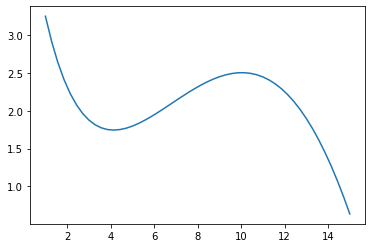

In [47]:
#Зададим непрерывную последовательность чисел при помощи numpy.linspace()
x = np.linspace(1, 15)
y = f(x)

#Построение графика функции и его отображение matplotlib.pylab.plot()
plt.plot(x, y)
plt.show()

# Приближение многочленом первой степени (прямой)

In [48]:
#Зададим конечные точки 
x1 = 1
x2 = 15

In [49]:
#Зададим матрицу коэффициентов
X = np.array([[1, x1],[1, x2]])
print(X, '\n')

#Зададим вектор решений
b = np.array([f(x1), f(x2)])
print(b)

[[ 1  1]
 [ 1 15]] 

[3.25221687 0.63522142]


In [50]:
#Создадим вектор-столбец решений
b = b.reshape(2, 1)
print(b)

[[3.25221687]
 [0.63522142]]


In [51]:
#Найдем решение нашей системы уравнений
import scipy.linalg
w = scipy.linalg.solve(X, b)
print(w)

[[ 3.43914511]
 [-0.18692825]]


In [52]:
def linf(x, w): # w - массив коэффициентов многочлена
    return w[1] * x + w[0]

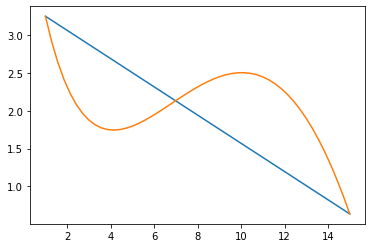

In [53]:
#Задание функции на промежтке x = [1, 5]
z = linf(x, w)

plt.plot(x, z)
plt.plot(x, y)
plt.show()

# Приближение многочленом второй степени (параболой)

In [54]:
#Зададим конечные точки 
x1 = 1
x2 = 8
x3 = 15

In [55]:
print("Значение функции в характерной точке f(1) =", f(1))
print("Значение функции в характерной точке f(8) =", f(8))
print("Значение функции в характерной точке f(15) =", f(15))

Значение функции в характерной точке f(1) = 3.252216865271419
Значение функции в характерной точке f(8) = 2.316170159053224
Значение функции в характерной точке f(15) = 0.6352214195786656


In [56]:
#Зададим матрицу коэффициентов
X = np.array([[1, x1, x1**2],[1, x2, x2**2], [1, x3, x3**2]])
print(X, '\n')

#Зададим вектор решений
b = np.array([f(x1), f(x2), f(x3)])
print(b)

[[  1   1   1]
 [  1   8  64]
 [  1  15 225]] 

[3.25221687 2.31617016 0.63522142]


In [57]:
#Создадим вектор-столбец решений
b = b.reshape(3, 1)
print(b)

[[3.25221687]
 [2.31617016]
 [0.63522142]]


In [58]:
#Найдем решение нашей системы уравнений
import scipy.linalg
w = scipy.linalg.solve(X, b)
print(w)

[[ 3.32512949]
 [-0.06531159]
 [-0.00760104]]


In [59]:
def linf_1(x, w): # w - массив коэффициентов многочлена
    return w[2]*(x**2) + w[1] * x + w[0]

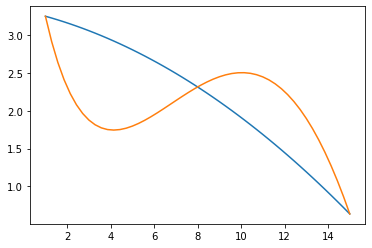

In [60]:
#Задание функции на промежтке x = [1, 15]
z = linf_1(x, w)

plt.plot(x, z)
plt.plot(x, y)
plt.show()

2.Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? 

Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)

# Приближение многочленом третьей степени (параболой)

In [61]:
#Зададим конечные точки 
x1 = 1
x2 = 4 
x3 = 10
x4 = 15

In [62]:
print("Значение функции в характерной точке f(1) =", f(1))
print("Значение функции в характерной точке f(8) =", f(4))
print("Значение функции в характерной точке f(15) =", f(10))
print("Значение функции в характерной точке f(15) =", f(15))

Значение функции в характерной точке f(1) = 3.252216865271419
Значение функции в характерной точке f(8) = 1.7468459495903677
Значение функции в характерной точке f(15) = 2.5054164070002463
Значение функции в характерной точке f(15) = 0.6352214195786656


In [63]:
#Зададим матрицу коэффициентов
X = np.array([[1, x1, x1**2, x1**3],[1, x2, x2**2, x2**3], [1, x3, x3**2, x3**3], [1, x4, x4**2, x4**3]])
print(X, '\n')

#Зададим вектор решений
b = np.array([f(x1), f(x2), f(x3), f(x4)])
print(b)

[[   1    1    1    1]
 [   1    4   16   64]
 [   1   10  100 1000]
 [   1   15  225 3375]] 

[3.25221687 1.74684595 2.50541641 0.63522142]


In [64]:
#Найдем решение нашей системы уравнений
import scipy.linalg
w = scipy.linalg.solve(X, b)
print(w)

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


In [65]:
def linf_2(x, w): # w - массив коэффициентов многочлена
    return w[3] * (x**3) + w[2] * (x**2) + w[1] * x + w[0]

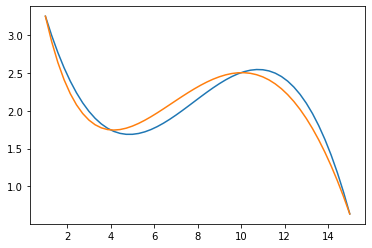

In [66]:
#Задание функции на промежтке x = [1, 15]
z = linf_2(x, w)

plt.plot(x, z)
plt.plot(x, y)
plt.show()

In [73]:
w = np.round(w, decimals=2)
print("Ответ :", *w, sep=' ')
with open("result_part_2.txt", 'w') as f:
    for i in w:
        f.write(str(i) + ' ')

Ответ : 4.36 -1.3 0.19 -0.01
